# CW1 - Object Recognition using CNN
To apply machine learning alorithms to clasify the testing images into object categories. Then use a model to perform classification and report quantitative results.

Due: Monday 19th April

# Introduction

The aim is to evaluate the use of CNN's in image recognition and the affect of adding multiple layers.

# Imports 

In [57]:
import numpy as np
from numpy import load
from numpy import asarray
from numpy import save
import matplotlib.pyplot as plt
import tensorflow as tf
import skimage.feature
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Conv2D, MaxPooling2D

ModuleNotFoundError: No module named 'keras'

# Load Data
There are 100 different categories of objects
each has 500 images for training and 100 images for testing.
Split the data into train and test sections

In [2]:
images = np.load('trnImage.npy')
label_fine = np.load('trnLabel_fine.npy')
label_coarse = np.load('trnLabel_coarse.npy')

#image_index = 1 # pick a specific image
#image = images[:, :, :, image_index]

test_images = np.load('tstImage.npy')
test_label_fine = np.load('tstLabel_fine.npy')
test_label_coarse = np.load('tstLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
print(f'Train Labels Fine Shape: {label_fine.shape}')
print(f'Train Labels Coarse Shape: {label_coarse.shape}')

Images Shape: (32, 32, 3, 50000)
Train Labels Fine Shape: (50000,)
Train Labels Coarse Shape: (50000,)


## Shuffle data to ensure not ordered

In [3]:
images = shuffle(images, random_state=0)
label_fine, label_coarse = shuffle(label_fine, label_coarse, random_state=0) #make sure the samples are not ordered


test_images = shuffle(test_images, random_state=0)
test_label_fine, test_label_coarse = shuffle(test_label_fine, test_label_coarse, random_state=0)

# CNN

## Normalise the data, for each image do a hog, add how to array, train images

In [4]:
try:
    train_images_normalised = load('hog_array_train.npy')
    print(train_images_normalised.shape)
except FileNotFoundError: 
    
    train_images_normalised = []
    
    for image_index in range(0, images.shape[3]):
        print(image_index, images.shape[3])
        image = images[:, :, :, image_index]

        # Extract features from a single image
        _, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)
        train_images_normalised.append(hog_image)
        
    train_images_output = np.array(train_images_normalised)
    data = asarray(train_images_output)
        # save to npy file
    save('hog_array_train.npy', data)
    

(50000, 32, 32)


In [5]:
try:
    test_images_normalised = load('hog_array_test.npy')
    print(test_images_normalised.shape)
    
except: 
    test_images_normalised = []
    for image_index in range(0, test_images.shape[3]):
        print(image_index, test_images.shape[3])
        image = test_images[:, :, :, image_index]

        # Extract features from a single image
        _, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)
        test_images_normalised.append(hog_image)

    train_images_output = np.array(test_images_normalised)
    data = asarray(train_images_output)
    save('hog_array_test.npy', data)

(10000, 32, 32)


## Check the Data cardinality

In [6]:
train_images_reshaped = train_images_normalised.reshape(50000, 32, 32, 1)
test_images_reshaped = test_images_normalised.reshape(10000, 32, 32, 1)

print("train shape " + str(train_images_reshaped.shape))
print("test shape " + str(test_images_reshaped.shape) + "\n")

print("coarse shape " + str(label_coarse.shape))
print("fine shape " + str(label_fine.shape)+ "\n")

output_num_fine = (np.unique(label_fine).shape[0])
print("Unique Fine labels " + str(output_num_fine))

output_num_coarse = (np.unique(label_coarse).shape[0])
print("unique Coarse Labels " + str(output_num_coarse))


train shape (50000, 32, 32, 1)
test shape (10000, 32, 32, 1)

coarse shape (50000,)
fine shape (50000,)

Unique Fine labels 100
unique Coarse Labels 20


## Split Training data into a train and test split

In [7]:
xTrn_split, xTst_split, yTrn_split, yTst_split = train_test_split(train_images_reshaped, label_coarse, test_size=0.2)

## Create a Tensorflow Convolutional Neural Network on the training set using Conv2D and pooling Layers

In [51]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 1)))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='elu', input_shape=(32, 32, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 32)        

## Train and fit the model

softmax - sed as the last activation function of a neural network to normalize the output of a network

In [52]:
model.add(tf.keras.layers.Flatten()) #dense layers can oinly have 1d so flattern araray to one dimension
model.add(tf.keras.layers.Dense(output_num_coarse*2, activation='selu'))
model.add(tf.keras.layers.Dense(output_num_coarse*2, activation='selu'))
model.add(tf.keras.layers.Dense(output_num_coarse*2, activation='selu'))
model.add(tf.keras.layers.Dense(output_num_coarse, activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
history = model.fit(xTrn_split, yTrn_split, epochs=100, 
                    validation_data=(xTst_split, yTst_split))

Epoch 1/100
1250/1250 [==============================] - 37s 29ms/step - loss: 3.0119 - accuracy: 0.0527 - val_loss: 3.0028 - val_accuracy: 0.0485
Epoch 2/100
1250/1250 [==============================] - 36s 29ms/step - loss: 3.0002 - accuracy: 0.0508 - val_loss: 2.9993 - val_accuracy: 0.0472
Epoch 3/100
1250/1250 [==============================] - 37s 29ms/step - loss: 2.9997 - accuracy: 0.0489 - val_loss: 3.0156 - val_accuracy: 0.0492
Epoch 4/100
1250/1250 [==============================] - 37s 29ms/step - loss: 2.9986 - accuracy: 0.0520 - val_loss: 2.9980 - val_accuracy: 0.0522
Epoch 5/100
1250/1250 [==============================] - 37s 29ms/step - loss: 2.9992 - accuracy: 0.0518 - val_loss: 2.9975 - val_accuracy: 0.0496
Epoch 6/100
1250/1250 [==============================] - 37s 29ms/step - loss: 2.9983 - accuracy: 0.0523 - val_loss: 3.0006 - val_accuracy: 0.0464
Epoch 7/100
1250/1250 [==============================] - 37s 29ms/step - loss: 2.9988 - accuracy: 0.0508 - val_loss: 3

KeyboardInterrupt: 

##  Predict labels for the testing set and check accuracy

In [23]:
print(model.predict(test_images_reshaped))

[[3.7208243e-05 1.3156892e-04 8.4406354e-02 ... 3.7541618e-03
  6.8277662e-04 3.7798347e-06]
 [2.9059731e-05 1.1924543e-05 2.9391385e-06 ... 9.7554401e-03
  3.2838815e-04 2.8069595e-02]
 [3.4600250e-02 1.7566413e-03 2.7504620e-01 ... 1.3324437e-01
  4.5037097e-03 1.9794952e-03]
 ...
 [6.2927839e-08 4.5048827e-04 1.7672627e-04 ... 2.4777933e-04
  4.0938912e-06 3.4276911e-07]
 [2.8218193e-02 7.2773695e-02 2.4289082e-01 ... 2.6041090e-01
  1.3819711e-02 1.8909350e-02]
 [3.2735559e-10 9.5278481e-14 1.7691275e-09 ... 6.7903623e-14
  7.1002150e-06 2.7496187e-08]]


## Plot models traing curves 

313/313 - 0s - loss: 4.4725 - accuracy: 0.0471
0.0471000000834465


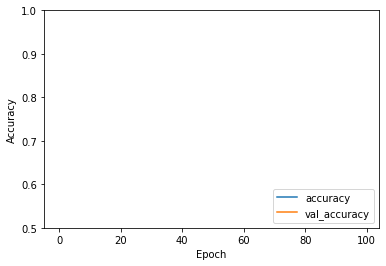

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_reshaped,  test_label_coarse, verbose=2)

print(test_acc)

In [40]:
score = model.evaluate(test_images_reshaped, test_label_coarse, verbose=0)
print(score)

[4.472523212432861, 0.0471000000834465]
